In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
users = pd.read_csv(r'C:\Users\phaneendra.veguru\Desktop\New folder\relax_challenge/takehome_users.csv',encoding='ISO-8859-1')
user_engagements = pd.read_csv(r'C:\Users\phaneendra.veguru\Desktop\New folder\relax_challenge/takehome_user_engagement.csv')

In [202]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [203]:
user_engagements.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [204]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [205]:
user_engagements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [206]:
user_engagements['time_stamp'] = pd.to_datetime(user_engagements['time_stamp'])
user_engagements.sort_values(["user_id", "time_stamp"], axis=0,ascending=True, inplace=True) 
user_engagements = user_engagements.set_index(keys='time_stamp')

In [207]:
#group the user by their id and sum no of times they visited in a week
group = user_engagements.groupby('user_id').resample('1W').sum()
#removes any Nan values 
group = group[group['user_id'].isnull()==False].drop('user_id',axis=1)

In [208]:
group.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0

In [209]:
adopted_users = group['visited']>=3
adopted_users.head()

user_id  time_stamp
1        2014-04-27    False
2        2013-11-17    False
         2013-11-24    False
         2013-12-01    False
         2013-12-08    False
Name: visited, dtype: bool

In [210]:
adopted_users = adopted_users.groupby(level=0).apply(np.sum)
adopted_users = adopted_users[adopted_users!=0]
adopted_users.head()

user_id
2      1
10    52
20     1
33     1
42    68
Name: visited, dtype: int64

In [211]:
adopted_users = pd.DataFrame(adopted_users)
adopted_users['active'] = 1
adopted_users.head(5)
#Active_Users = list(adopted_users.index)

,visited,active
user_id,,
2,1,1
10,52,1
20,1,1
33,1,1
42,68,1


In [212]:
users = users.drop([ 'name', 'email','last_session_creation_time',],axis=1)
#users['active'] = 0
users.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0


In [213]:
Data= users.merge(adopted_users,how='left', left_on='object_id', right_on='user_id').fillna(0)


In [214]:
Data = Data.drop([ 'visited',],axis=1)

In [215]:
Data.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0


Adopted users are identified and created a column in the dataframe as the column active so that ,now use that to know which features predict active users.

In [216]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
active                        12000 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 843.8+ KB


In [217]:
import seaborn as sns

In [218]:
Data.active.value_counts()

0.0    10555
1.0     1445
Name: active, dtype: int64

There are only 1445 adopted users.

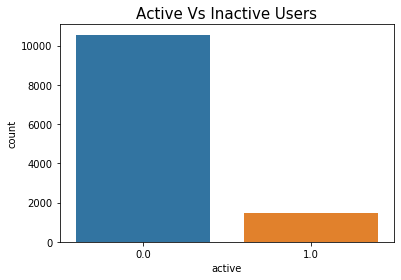

In [219]:
plt.title('Active Vs Inactive Users', fontsize=15)
sns.countplot(Data.active)


ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

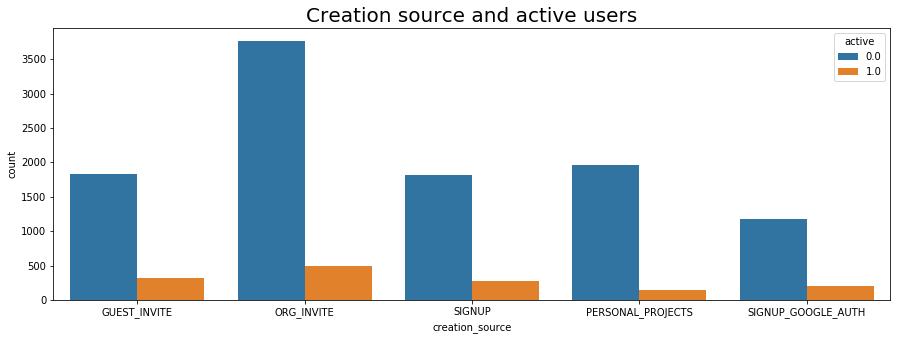

In [220]:
plt.figure(figsize=(15,5))
plt.title('Creation source and active users', fontsize=20)
sns.countplot(x='creation_source',hue='active', data = Data)

Data['creation_source'].value_counts()

In [221]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit_transform(Data['creation_source'])
print(list(le.classes_))
Data['source']= le.transform(Data['creation_source']) 

['GUEST_INVITE', 'ORG_INVITE', 'PERSONAL_PROJECTS', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH']


In [222]:
Data.head()

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active,source
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0.0,1
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0.0,0


In [227]:
X =  Data.drop(['active','creation_source','creation_time'],axis=1)
X.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,source
0,1,1,0,11,10803.0,0
1,2,0,0,1,316.0,1
2,3,0,0,94,1525.0,1
3,4,0,0,1,5151.0,0
4,5,0,0,193,5240.0,0


In [225]:
y = pd.DataFrame(Data['active'])
y.head()

,active
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [229]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X,y)

# Print the name and gini importance of each feature

sort_features=dict(zip(X.columns, clf.feature_importances_))
cols = sorted(sort_features, key=lambda x: sort_features[x] , reverse=True)
for i in cols:
    print(i +'---', round(sort_features[i],4))

object_id--- 0.453
org_id--- 0.3282
invited_by_user_id--- 0.1821
opted_in_to_mailing_list--- 0.0137
source--- 0.013
enabled_for_marketing_drip--- 0.01


C:\Users\phaneendra.veguru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\phaneendra.veguru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


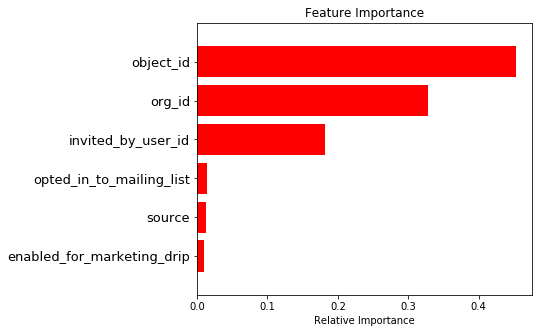

In [231]:
importance = clf.feature_importances_
sorted_importances = np.argsort(importance)
    
from pylab import rcParams
rcParams['figure.figsize']=6,5

plt.barh(range(X.shape[1]), importance[sorted_importances], color="r", align="center")
# Customize the plot
plt.yticks(range(X.shape[1]), X.columns[sorted_importances], fontsize=13)
plt.xlabel("Relative Importance")
plt.ylim([-1, X.shape[1]])
plt.title("Feature Importance")
plt.show()

As we can the the feature "org_id" plays an important part to predict whether user are "adopted" or not.

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)


In [233]:
rf = RandomForestClassifier(n_estimators=200,  n_jobs=4, min_samples_leaf=10)    
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: %.5f" % (acc))

C:\Users\phaneendra.veguru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


NameError: name 'accuracy_score' is not defined